In [392]:
import pandas as pd



In [393]:
from scipy.stats import mode #for imputing missing values

In [394]:
from pandas.api.types import CategoricalDtype

In [395]:
import numpy as np

In [396]:
import matplotlib.pyplot as plt

In [397]:
train = pd.read_csv("/Users/dilruba_p/desktop/my_project/train_UWu5bXk.csv")



In [398]:
test=pd.read_csv("/Users/dilruba_p/desktop/my_project/Test_u94Q5KV copy.csv")

In [399]:
train.shape


(8523, 12)

In [400]:
test.shape 

(5681, 11)

In [401]:
train.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [402]:
test['Item_Outlet_Sales'] = 0
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0


In [403]:
 combi=train.append(test)

combi.shape



In [405]:
combi.Item_Type

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
5                Baking Goods
6                 Snack Foods
7                 Snack Foods
8                Frozen Foods
9                Frozen Foods
10      Fruits and Vegetables
11                      Dairy
12      Fruits and Vegetables
13                Snack Foods
14      Fruits and Vegetables
15                  Breakfast
16         Health and Hygiene
17                  Breakfast
18                Hard Drinks
19                      Dairy
20                Snack Foods
21               Baking Goods
22                  Household
23               Baking Goods
24               Frozen Foods
25                  Household
26                Snack Foods
27                Hard Drinks
28                      Dairy
29                     Canned
                ...          
5651            Starchy Foods
5652    Fruits and Vegetables
5653    Fr

In [406]:
combi

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [407]:
m = {"Low Fat": ['LF','Low Fat','low fat'], "Regular": ['Regular','reg']}

In [408]:
m2 = {v: k for k,vv in m.items() for v in vv}

In [409]:
combi['Item_Fat_Content']=combi.Item_Fat_Content.map(m2).astype("category", categories=set(m2.values()))


/Users/dilruba_p/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [410]:
#counting the fat levels for each item type

In [411]:
fat_item_type=combi['Item_Fat_Content'].groupby(combi['Item_Type']).count()



In [412]:
fat_item_type

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
Name: Item_Fat_Content, dtype: int64

In [413]:
#  assigning a fat content to non-food items, i.e. the
# categories "Health and Hygiene", "Household" and "Others"
# makes no sense.
# We have to introduce a fat level "None" for them

In [414]:
m1 = {"Low Fat": ['LF','Low Fat','low fat'], "Regular": ['Regular','reg'],"None":['None']}

In [415]:
m3 = {v: k for k,vv in m1.items() for v in vv}

In [416]:
combi['Item_Fat_Content']=combi.Item_Fat_Content.map(m3).astype("category", categories=set(m3.values()))


/Users/dilruba_p/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [417]:
#set the fat content for health and Hygiene type of Item 

In [418]:
combi.iloc[:,2][combi.Item_Type==("Health and Hygiene")]='None'



In [419]:
combi.iloc[:,2][combi.Item_Type==("Health and Hygiene")]


16      None
31      None
35      None
46      None
50      None
69      None
94      None
132     None
147     None
177     None
182     None
187     None
200     None
239     None
242     None
257     None
328     None
361     None
371     None
401     None
403     None
424     None
436     None
448     None
459     None
490     None
507     None
526     None
548     None
571     None
        ... 
5253    None
5273    None
5284    None
5294    None
5300    None
5318    None
5337    None
5374    None
5375    None
5386    None
5405    None
5420    None
5422    None
5458    None
5471    None
5513    None
5515    None
5516    None
5530    None
5563    None
5570    None
5579    None
5601    None
5604    None
5606    None
5611    None
5621    None
5635    None
5642    None
5678    None
Name: Item_Fat_Content, Length: 858, dtype: category
Categories (3, object): [Regular, None, Low Fat]

In [420]:
#for others and House Holds items same procedure is repeated

In [421]:
combi.iloc[:,2][combi.Item_Type==("Others")]='None'

In [422]:
combi.iloc[:,2][combi.Item_Type==("HouseHold")]='None'

In [423]:

# count fat levels for each Item type again!

In [424]:
fat_item_type=combi['Item_Fat_Content'].groupby(combi['Item_Type']).count()

In [425]:
fat_item_type

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
Name: Item_Fat_Content, dtype: int64

In [426]:
#some entries for Outlet_Size are empty
# let's temporarily call them "Other"

In [427]:
#taking care of missing values

In [428]:
sum(combi['Outlet_Size'].isnull().values.ravel())

4016

In [429]:
combi['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
5       Medium
6         High
7       Medium
8          NaN
9          NaN
10      Medium
11       Small
12      Medium
13       Small
14        High
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20        High
21      Medium
22       Small
23       Small
24       Small
25         NaN
26       Small
27        High
28         NaN
29       Small
         ...  
5651      High
5652       NaN
5653     Small
5654      High
5655    Medium
5656    Medium
5657     Small
5658      High
5659    Medium
5660      High
5661    Medium
5662       NaN
5663    Medium
5664    Medium
5665    Medium
5666     Small
5667     Small
5668       NaN
5669    Medium
5670       NaN
5671    Medium
5672    Medium
5673    Medium
5674     Small
5675    Medium
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [430]:
pd.isnull(combi['Outlet_Size'])

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
5651    False
5652     True
5653    False
5654    False
5655    False
5656    False
5657    False
5658    False
5659    False
5660    False
5661    False
5662     True
5663    False
5664    False
5665    False
5666    False
5667    False
5668     True
5669    False
5670     True
5671    False
5672    False
5673    False
5674    False
5675    False
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [431]:
combi['Outlet_Size'].isnull().sum(axis=0)

4016

In [432]:
# boxplot Item Type vs Item Weight

In [433]:
slice=combi.iloc[:,[1,4]]

In [434]:
bp = slice.boxplot(column='Item_Weight', by='Item_Type')

In [435]:
axes = plt.gca()

In [436]:
axes.set_ylim([0,800])

(0, 800)

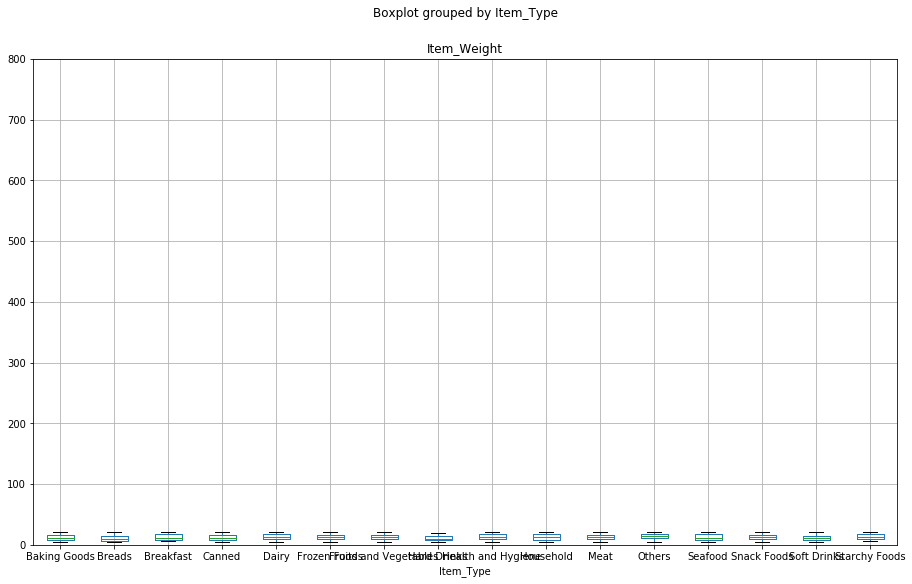

In [437]:
plt.show()

In [438]:

# boxplot of weights vs. Outlet Identifier

In [439]:
slice2=combi.iloc[:,[1,6]]

In [440]:
bp = slice2.boxplot(column='Item_Weight', by='Outlet_Identifier')

In [441]:
axes = plt.gca()

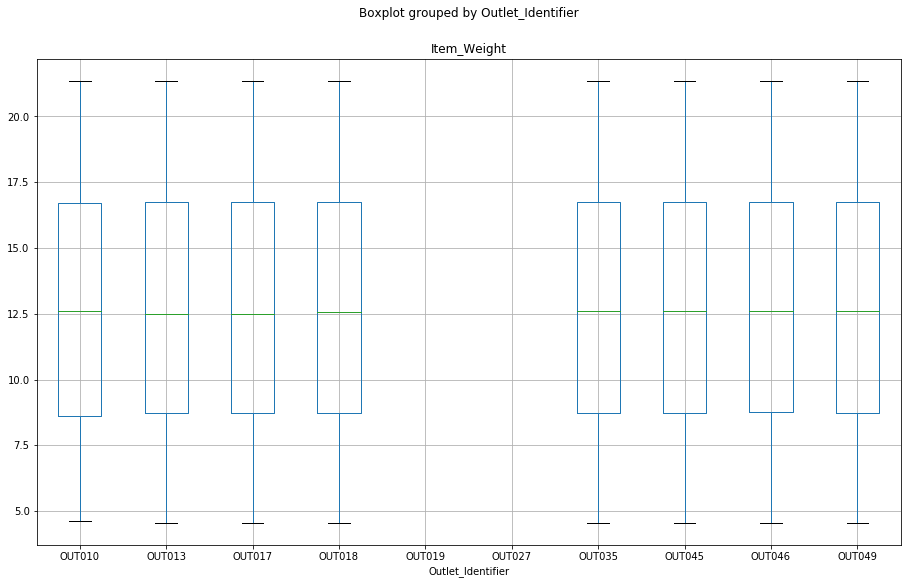

In [442]:
plt.show()

In [443]:
#let's create a dataframe containing the mean
# weights and standard deviations by item identifier

In [444]:
combi=combi[combi.notnull()]

In [445]:
byItemIdentifier= combi.groupby(['Item_Identifier'])

In [446]:
#we can now use these values to fill in the missing weight values:

In [447]:
combi['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7          NaN
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18         NaN
19      13.350
20      18.850
21         NaN
22      14.600
23         NaN
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29         NaN
         ...  
5651     9.500
5652     6.650
5653     6.760
5654     7.275
5655       NaN
5656       NaN
5657    16.200
5658    15.600
5659     5.000
5660     9.800
5661       NaN
5662     9.800
5663    16.200
5664    13.000
5665       NaN
5666     9.300
5667     9.395
5668    15.600
5669       NaN
5670    10.395
5671    15.000
5672     6.860
5673     7.070
5674    15.700
5675    13.000
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 14204, dtype: float64

In [448]:


combi['Item_Weight'] = combi['Item_Weight'].fillna((combi['Item_Weight'].mean()))

In [449]:
combi['Item_Weight']

0        9.300000
1        5.920000
2       17.500000
3       19.200000
4        8.930000
5       10.395000
6       13.650000
7       12.792854
8       16.200000
9       19.200000
10      11.800000
11      18.500000
12      15.100000
13      17.600000
14      16.350000
15       9.000000
16      11.800000
17       9.000000
18      12.792854
19      13.350000
20      18.850000
21      12.792854
22      14.600000
23      12.792854
24      13.850000
25      13.000000
26       7.645000
27      11.650000
28       5.925000
29      12.792854
          ...    
5651     9.500000
5652     6.650000
5653     6.760000
5654     7.275000
5655    12.792854
5656    12.792854
5657    16.200000
5658    15.600000
5659     5.000000
5660     9.800000
5661    12.792854
5662     9.800000
5663    16.200000
5664    13.000000
5665    12.792854
5666     9.300000
5667     9.395000
5668    15.600000
5669    12.792854
5670    10.395000
5671    15.000000
5672     6.860000
5673     7.070000
5674    15.700000
5675    13

In [450]:
##redoing the  boxplots to see the affects of imputation

In [451]:
slice=combi.iloc[:,[1,4]]

In [452]:
bp = slice.boxplot(column='Item_Weight', by='Item_Type')

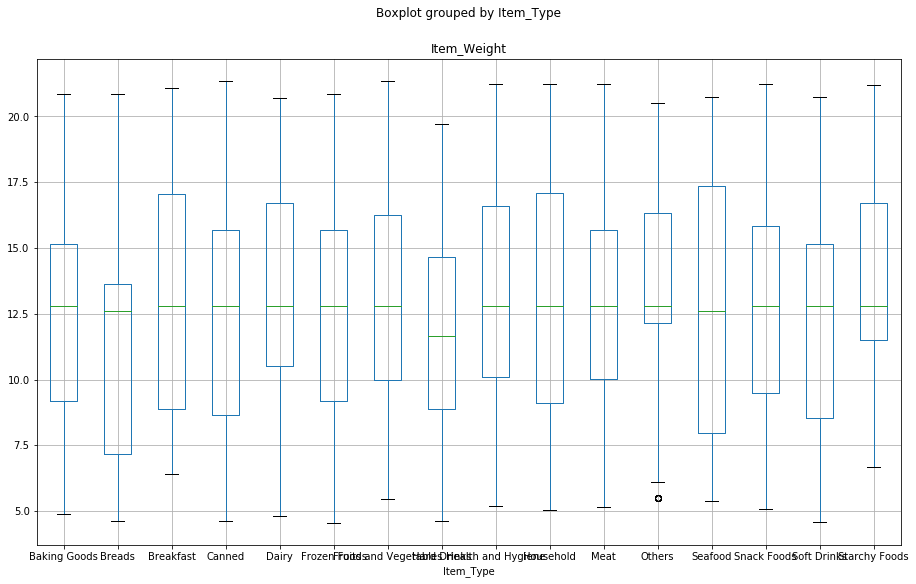

In [453]:
plt.show()

In [454]:
#feature engineering

In [455]:
# the data are from 2013, hence we'll replace the
# Outlet Establishment Year by the number of years

In [456]:
combi['Year'] =(2013 - combi['Outlet_Establishment_Year'])

In [457]:
del combi['Outlet_Establishment_Year']

In [458]:
combi

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,4
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,26
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,28
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,11
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,6


In [459]:
combi['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
5        51.4008
6        57.6588
7       107.7622
8        96.9726
9       187.8214
10       45.5402
11      144.1102
12      145.4786
13      119.6782
14      196.4426
15       56.3614
16      115.3492
17       54.3614
18      113.2834
19      230.5352
20      250.8724
21      144.5444
22      196.5084
23      107.6938
24      165.0210
25       45.9060
26       42.3112
27       39.1164
28       45.5086
29       43.6454
          ...   
5651    186.1898
5652    126.7678
5653     80.2960
5654    144.5760
5655    143.6786
5656    207.8296
5657    261.3278
5658    123.4704
5659    188.8530
5660    215.3850
5661    155.7972
5662    214.3850
5663     72.8696
5664    173.4054
5665     46.0718
5666    196.9084
5667     82.1250
5668    115.1518
5669    188.0530
5670    229.4352
5671     59.5904
5672    231.1010
5673    116.0834
5674     43.2770
5675     63.4484
5676    141.3154
5677    169.1448
5678    118.74

In [460]:
from ggplot import *

In [461]:
ggplot(diamonds, aes(x='price', color='clarity')) + \
    geom_density() + \
    scale_color_brewer(type='div', palette=7) + \
    facet_wrap('cut'

SyntaxError: unexpected EOF while parsing (<ipython-input-461-572bd436300a>, line 1)

In [ ]:
from ggplot import *


In [ ]:
##ggplot(combi, aes(x='Item_MRP') + \ geom_density()

In [ ]:
# Clearly, there are four different price categories
# We'll introduce a new factor MRP_Level to mark
# those groups

In [ ]:
breaks=[0,69,136,203,pd.np.inf]

In [ ]:
diff=np.diff(breaks).tolist()

In [ ]:
## make tuples of *breaks* and length of intervals
joint = list(zip(breaks,diff))

In [ ]:
s1 = "{left:,.0f} to {right:,.0f}"

In [ ]:
joint

In [ ]:
labels = [s1.format(left=yr[0], right=yr[0]+yr[1]-1) for yr in joint]

In [ ]:
combi['MRP_Levels'] = pd.cut(combi['Item_MRP'],breaks, labels=labels, right=False)

In [ ]:
# reorder the dataset such that the response variable Item_Outlet_Sales comes last


In [ ]:
sequence = ['Item_Identifier',
                          'Item_Weight',
                          'Item_Fat_Content',
                          'Item_Visibility',
                          'Item_Type',
                          'Item_MRP',
                          'Outlet_Identifier',
                          'Outlet_Size',
                          'Outlet_Location_Type',
                          'Outlet_Type',
                          'Year',
                          'MRP_Levels',
                          'Item_Outlet_Sales']
combi= combi.reindex(columns=sequence)

In [ ]:
# Earlier, we introduced an Outlet_Size "Other" 
# for the missing values in that category


In [ ]:
# how often does each Outlet_Identifier appear in the dataombi$Outlet_Identifier), FUN=length)
combi['Outlet_Identifier'].groupby(combi['Outlet_Identifier']).count()

In [ ]:
# According to results,  it is obvious thatthe two grocery stores, OUT010 and OUT019 have reported 
# less data than other supermarkets.

In [ ]:
#in this case we have to make an assumption that those stores has smaller selection of items to buy

# To check we have to count the Item IDs:


In [ ]:
combi[combi.index.duplicated()]# got a duplication error had to check it 

In [ ]:
combi.reset_index(inplace=True)

In [ ]:
combi[combi.Outlet_Identifier=='OUT010'].groupby(combi['Item_Identifier'])['Outlet_Identifier'].count()

In [ ]:
combi[combi.Outlet_Identifier=='OUT019'].groupby(combi['Item_Identifier'])['Outlet_Identifier'].count()

In [ ]:

# Our suspicion is therefore confirmed, grocery
# stores simply have a smaller selection of
# wares to sell.

In [ ]:
# What else can we learn about the different types of shops?

In [ ]:

# boxplot of  Sales vs. Outlet identifier

In [ ]:
ggplot(combi[:,], aes(Outlet_Type, Item_Outlet_Sales)) +
  geom_boxplot() +
  xlab("Outlet identifier") + 
    ylab("Sales") + 
     ggtitle("Sales vs Outlet identifier")


In [ ]:
# boxplot of  Sales vs. Outlet Type
ggplot(combi[1:nrow(train),], aes(x = Outlet_Type, y = Item_Outlet_Sales, fill = Year)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "black")) + 
  xlab("Outlet Type") + 
  ylab("Sales") + 
  ggtitle("Sales vs Outlet Type")

In [ ]:
slice2=combi.iloc[:,[9,10]]

In [ ]:
bp = slice2.boxplot(column='Outlet_Type', by='Item_Outlet_Sales')

In [ ]:
#count the number of others per Outlet_Identifier and Outlet_Type

In [ ]:

combi.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type']).count()

In [ ]:
# a Grocery store certainly falls in the size category Small
# Type 1 supermarkets are most often classified as Small,
# i.e. the mode is "Small"
# Hence, we'll classify the two "Other" Type 1 supermarkets
# as "Small"
# so we only have to replace "Other" by "Small"

In [ ]:
combi['Outlet_Size'].astype('category').unique()


In [ ]:
value='other'

In [ ]:
combi['Outlet_Size']=combi['Outlet_Size'].fillna(value)

In [ ]:
# nan values are changed to other to adjust the factor levels

In [ ]:
combi['Outlet_Size'].astype('category').unique()


In [ ]:
# since we have more small stores than  the rest of the stores, we will fill other values with small values

In [ ]:
 m = {"Medium":["Medium"],"High": ["High"], "Small": ["Small","other"]}
m2 = {v: k for k,vv in m.items() for v in vv}


In [ ]:
combi['Outlet_Size']=combi.Outlet_Size.map(m2).astype("category", categories=set(m2.values()))  ## we reduced the levels int 3 ;eve;s

In [ ]:
combi['Outlet_Size']

In [ ]:
# boxplot of  Sales vs. Outlet location

In [ ]:
combi

In [ ]:
slice=combi.iloc[:,[9,13]]

In [ ]:
bp = slice.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type')

In [ ]:
plt.show()

In [ ]:
# boxplot of  Sales vs. Outlet type

In [ ]:
slice=combi.iloc[:,[10,13]]
bp = slice.boxplot(column='Item_Outlet_Sales', by='Outlet_Type')
plt.show()


In [ ]:

# boxplot of  Sales vs. Item type

In [ ]:

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size

In [ ]:
fig_size[0] = 15 ## had to change the size of plot to prevent it from overlapping 
fig_size[1] = 9

In [ ]:
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
slice=combi.iloc[:,[5,13]]
bp = slice.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.show()


In [ ]:
# Technically, there are no entries missing in
# the Item_Visibility category.
# However, plenty of entries are zero.
# This looks like a mistake in the data

In [ ]:
# boxplot of Visibility vs Item type

In [ ]:
slice=combi.iloc[:,[4,5]]
bp = slice.boxplot(column='Item_Visibility', by='Item_Type')
plt.show()

In [ ]:

# boxplot of Visibility vs. Outlet Identifier

In [ ]:
slice=combi.iloc[:,[4,7]]
bp = slice.boxplot(column='Item_Visibility', by='Outlet_Identifier')
plt.show()

In [ ]:
# as can be seen from the graph store 10 and store 19  has much more higher visibility compared to other stores

In [ ]:

# We use the MICE package to impute those missing values

In [ ]:
combi['Item_Visibility']

In [ ]:
# to compare the visibility distributions before
# and after imputing the missing values
# we create a copy of the non-vanishing entries


In [ ]:
combi.query('Item_Visibility>0')

In [ ]:
combi['Item_Visibility'].replace(0,np.nan)

In [ ]:

#any missing values now?
table(is.na(combi))
colSums(is.na(combi))

In [ ]:
#pattern of missing values
md.pattern(combi)

In [ ]:

# replace 0 by NA so that mice can work its magic
outletIdentifiers <- levels(combi$Outlet_Identifier)
itemTypes <- levels(combi$Item_Type)
for (outName in outletIdentifiers) {
  for (itemName in itemTypes) {
    combi[ which(combi$Outlet_Identifier == outName &
                   combi$Item_Type == itemName),]$Item_Visibility <-
      ifelse(
        combi[ which(combi$Outlet_Identifier == outName &
                       combi$Item_Type == itemName), ]$Item_Visibility == 0 ,
        NA ,
        combi[ which(combi$Outlet_Identifier == outName &
                       combi$Item_Type == itemName),]$Item_Visibility
      )
  }
}

In [ ]:

# replace 0 by NA so that mice can work its magic
outletIdentifiers <- levels(combi$Outlet_Identifier)
itemTypes <- levels(combi$Item_Type)
for (outName in outletIdentifiers) {
  for (itemName in itemTypes) {
    combi[ which(combi$Outlet_Identifier == outName &
                   combi$Item_Type == itemName),]$Item_Visibility <-
      ifelse(
        combi[ which(combi$Outlet_Identifier == outName &
                       combi$Item_Type == itemName), ]$Item_Visibility == 0 ,
        NA ,
        combi[ which(combi$Outlet_Identifier == outName &
                       combi$Item_Type == itemName),]$Item_Visibility
      )
  }
}